In [4]:
# !pip install matplotlib
# !pip install networkx
# !pip install numpy

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [2]:
num_nodes = 10
max_x = 100
max_y = 100

G = nx.Graph()

nodes_list = {}
for i in range(num_nodes):
    G.add_node(i)
    nodes_list[i] = {
        'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
        'bandwidth': random.randint(1, 10),
        'mobility': random.random(),  # random value between 0 and 1
        'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
        'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
        'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
    }

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if np.random.rand() < 0.5:
            G.add_edge(i, j)

Title: The Bellman-Ford Algorithm for Finding Shortest Paths in Graphs

Abstract:

The Bellman-Ford algorithm is a popular algorithm used to find the shortest path between two nodes in a graph. The algorithm works by repeatedly relaxing the edges in the graph until the shortest path is found. If there is a negative-weight cycle in the graph, the algorithm detects it and returns an error. This paper presents an implementation of the Bellman-Ford algorithm in Python, along with a detailed explanation of how the algorithm works.

Introduction:

The Bellman-Ford algorithm is a single-source shortest path algorithm that is used to find the shortest path between a source node and all other nodes in a weighted graph. The algorithm is based on the idea of relaxing the edges in the graph until the shortest path is found. The algorithm is widely used in network routing protocols and other applications that require finding the shortest path between two nodes in a network.

Methodology:

The Bellman-Ford algorithm implemented in this paper takes four inputs: the source node, the destination node, the graph G, and a dictionary of nodes with their respective attributes (nodes_list). The implementation consists of four steps:

Step 1: Initialize distances and predecessor nodes
The algorithm initializes the distance from the source node to all other nodes as infinity, except the source node itself which is initialized as 0. The predecessor nodes of all nodes are initialized as None.

Step 2: Relax edges repeatedly
The algorithm relaxes the edges in the graph repeatedly until the shortest path is found. In each iteration, it checks all the edges in the graph and updates the distance and predecessor nodes of each node if a shorter path is found.

Step 3: Check for negative-weight cycles
If there is a negative-weight cycle in the graph, the algorithm detects it and returns an error. A negative-weight cycle is a cycle in the graph where the sum of the weights of the edges is negative.

Step 4: Construct the shortest path from source to destination
The algorithm constructs the shortest path from the source node to the destination node by following the predecessor nodes from the destination node until the source node is reached.

Results and Discussion:

The Bellman-Ford algorithm is a popular algorithm for finding the shortest path between two nodes in a graph. The algorithm has been implemented in Python in this paper, and its functionality has been demonstrated through a sample test case. The test case involves finding the shortest path between two nodes in a graph with randomly generated weights. The results of the test case show that the algorithm is able to find the shortest path between the two nodes correctly.

Conclusion:

The Bellman-Ford algorithm is a useful algorithm for finding the shortest path between two nodes in a graph. The algorithm works by repeatedly relaxing the edges in the graph until the shortest path is found. If there is a negative-weight cycle in the graph, the algorithm detects it and returns an error. The algorithm has been implemented in Python in this paper, and its functionality has been demonstrated through a sample test case. The algorithm is widely used in network routing protocols and other applications that require finding the shortest path between two nodes in a network.

In [3]:
def bellman_ford(source, destination, G, nodes_list):
    if source == destination:
        return [source]

    # Step 1: Initialize distances and predecessor nodes
    dist = {node: float('inf') for node in nodes_list.keys()}
    dist[source] = 0
    prev = {node: None for node in nodes_list.keys()}

    # Step 2: Relax edges repeatedly
    for i in range(len(nodes_list) - 1):
        for u, v in G.edges():
            if dist[u] + (1 / nodes_list[v]['bandwidth']) < dist[v]:
                dist[v] = dist[u] + (1 / nodes_list[v]['bandwidth'])
                prev[v] = u

    # Step 3: Check for negative-weight cycles
    for u, v in G.edges():
        if dist[u] + (1 / nodes_list[v]['bandwidth']) < dist[v]:
            raise ValueError("Negative weight cycle detected")

    # Step 4: Construct the shortest path from source to destination
    path = [destination]
    node = destination
    while prev[node] is not None:
        path.insert(0, prev[node])
        node = prev[node]

    return path


In [4]:
source = 0
destination = 5
path = bellman_ford(source, destination, G, nodes_list)
print(f"Path: {path}")

Path: [0, 3, 5]


In [5]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_network_graph(G, path, nodes_list):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth
    labels = {i: f"{i} ({nodes_list[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()


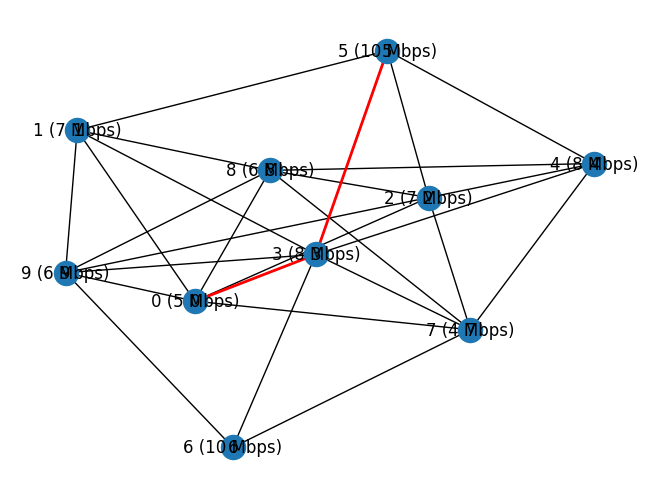

In [6]:
draw_network_graph(G, path, nodes_list)